# PROPHET

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

As an example, let’s look at a time series of the log daily page views for the Wikipedia page for Peyton Manning. 

First we’ll import the data:

In [1]:
# Python
import pandas as pd
from fbprophet import Prophet
url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\Example Prophet.csv"
df = pd.read_csv(url)
print(df.head())
print(df.tail())

           ds         y
0  12/10/2007  9.590761
1  12/11/2007  8.519590
2  12/12/2007  8.183677
3  12/13/2007  8.072467
4  12/14/2007  7.893572
             ds          y
2900  1/16/2016   7.817223
2901  1/17/2016   9.273878
2902  1/18/2016  10.333775
2903  1/19/2016   9.125871
2904  1/20/2016   8.891374


We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [2]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ivonnics\Anaconda3\envs\PROPHET\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Checking Pandas, Prophet and Pystan installed versions

In [3]:
import pandas
pandas.__version__

'0.23.4'

In [4]:
import fbprophet
fbprophet.__version__

'0.4'

In [5]:
import pystan
pystan.__version__

'2.17.1.0'

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.211273,7.508498,8.967889
3266,2017-01-16,8.536290,7.786154,9.262466
3267,2017-01-17,8.323693,7.610762,8.989941
3268,2017-01-18,8.156351,7.418522,8.933045
3269,2017-01-19,8.168285,7.483152,8.914190


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

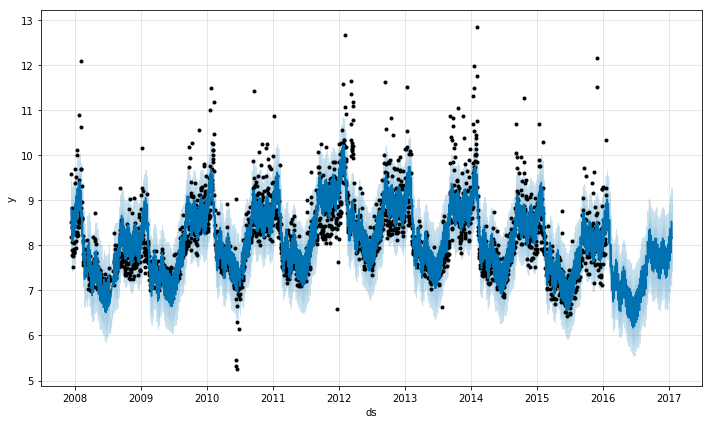

In [8]:
fig1 = m.plot(forecast)


If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

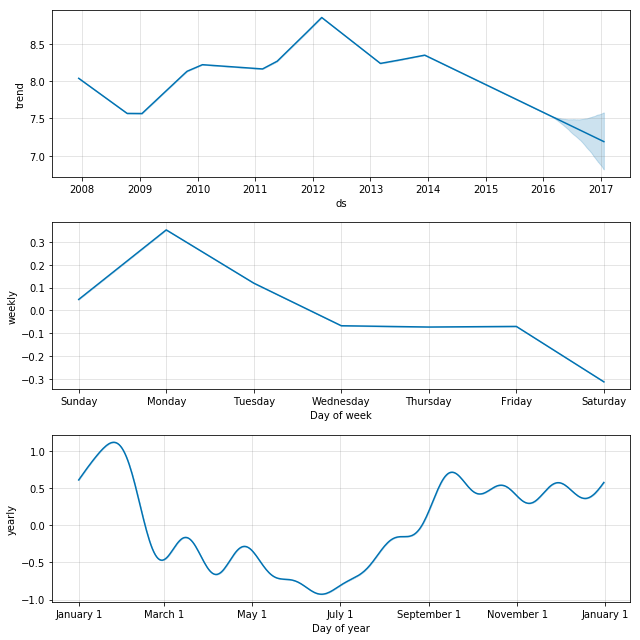

In [9]:
fig2 = m.plot_components(forecast)


More details about the options available for each method are available in the docstrings, for example, via help(Prophet) or help(Prophet.fit). The R reference manual on CRAN provides a concise list of all of the available functions, each of which has a Python equivalent.